# GEO3466 Practical 2 Numerical Ecosystem Modelling

## Overview of the Practical

In this practical we will use numerical ecosystem modelling to explore the interactions between phytoplankton, zooplankton and their environment. We will use two different types of models, a predator-prey model, and a Nutrient, Phytoplankton and Zooplankton (NPZ) model. 

## Aims of the Practical and Intended Learning Outcomes

This practical aims to teach the concepts of numerical ecosystem modelling, and show how it can be used as a tool for understanding biological oceanography. As an outcome of this practical you will be able to

1. Implement a basic predator-prey model.
1. Implement a basic NPZ model.
2. Use these ecosystem models to test ecological questions.
3. Become a more experienced Python coder.

Additional information on numerical ecosystem modelling is provided in Lecture 6 of GEO3466: "Numerical Ecosystem Modelling". For further details on numerical models, I also recommend reading Chapter 4 of Miller & Wheeler (2012), much of which this practical is based on.

## Python packages required for the practical

Please note that this practical is designed such that each cell (block of Python code) is run after the previous cell. If you clear or restart the practical, you will need to run through each cell from the start. 

Please run the following lines of code to ensure you have called the right packages for the practical. To do this click on the code (cell) below and then click the run button at the top of the page. 

In [1]:
#Import all packages required for practical
import numpy as np
import math as mt
from math import nan
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

## A predator-prey model

We begin by introducing the classical Lotka-Volterra predator-prey model (Lotka 1925, Volterra, 1926a,b). The model describes the interaction between two populations in a biological system, the predator ($Z$, taken here to be zooplankton) and the prey ($P$, taken here to be phytoplankton), using the following two differential equations

\begin{equation}
\frac{d P}{d t} = \alpha P - \beta PZ,
\end{equation}

and

\begin{equation}
\frac{d Z}{d t} = \delta PZ - \gamma Z,
\end{equation}

where, $\frac{d P}{d t}$ represent the exponential growth of phytoplankton, $\frac{d Z}{d t}$ the growth of zooplankton, $\alpha$ is the net growth rate of the phytoplankton, $\gamma$ is the death rate of the zooplankton, and $\beta$ and $\delta$ are positive parameters describing the interactions between the two populations.

The Lotka-Volterra predator-prey model makes a series of assumptions:

- The phytoplankton population has amply resources (nutrients and light) at all times.
- The supply of food to zooplankton depends entirely on the size of the phytoplankton population.
- The rate of change of phytoplankton and zooplankton is proportional to their size.
- The environment never changes in favour of one species (no genetic adaptation).
- Zooplankton have a limitless appetite.
- There is no time difference from when zooplankton consume phytoplankton and convert them to new zooplankton.

Other assumptions exist as well, and many of these assumptions are not realistic. Nonetheless, these equations have proven useful in biological oceanography (and ecology more generally).

The differential equations have no explicate solution, and so interactions are approximated by finite-difference equations, where a time increment is repeatedly applied to make sequential calculations (Miller & Wheeler, 2012). This is referred to as the Euler's method, which is a first-order numerical procedure designed to solve differential equations with a given initial value. 

Let's begin by implementing these equations in Python in a hypothetical case. To do this we:
- Define the time steps. For this example, we are going to run the model for 100 days at hourly time-steps.
- We then set-up the vectors for $P$, $Z$ and time.
- We then define some parameters for our model, for $\alpha$, $\beta$, $\delta$ and $\gamma$.
- We provide initial starting conditions for phytoplankton and zooplankton. We start by satisfying steady state conditions, where $\frac{d P}{dt}$ = $\frac{d Z}{dt}$ = 0, and we can assume $P = \gamma/\delta$ and $Z = \alpha/\beta$.
- Given the parameters are daily values, we divide by 24 (steps) to convert to hourly.
- We then loop though each day and hour (step) and solve our differential equations using the Euler's method.
- Finally, we plot a time-series of the results 

Let us run these equations and look at the output graphically using Python. Run the following lines of Python code.

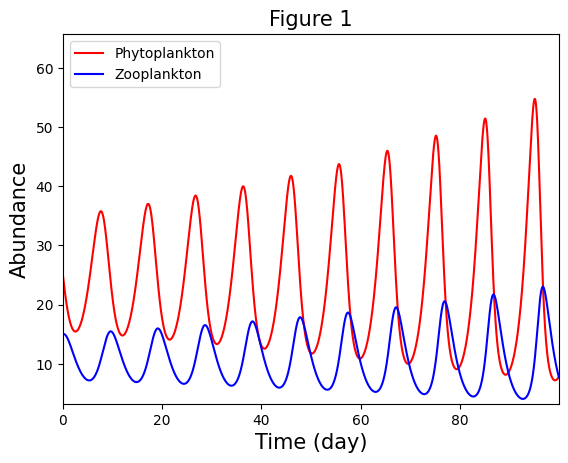

In [8]:
# Define time-steps
Days      = 100
Steps     = 24

# Set-up vectors for Phyto- and Zoo-plankton
PHYTO     = np.full(Days*Steps, 0.)
ZOOPL     = np.full(Days*Steps, 0.)
TIME      = np.full(Days*Steps, 0.)

# Define parameters for the model (daily rates)
ALPHA     = 0.75
BETA      = 0.07
DELTA     = 0.025
GAMMA     = 0.6

# Initial guess for phytoplankton (prey) and zooplankton (predator)
PHYTO_IG  = 25 
ZOOPL_IG  = 15 

# Reduce parameters to steps within a day (hourly rates)
ALPHA_S   = ALPHA/Steps
BETA_S    = BETA/Steps
DELTA_S   = DELTA/Steps
GAMMA_S   = GAMMA/Steps

# Main daily loop
ct = 0
for i in range(Days):
    for i in range(Steps):
        TIME[ct]  = ct/Steps
        PHYTO[ct] = PHYTO_IG
        ZOOPL[ct] = ZOOPL_IG
        DP        = ALPHA_S*PHYTO_IG - BETA_S*ZOOPL_IG*PHYTO_IG
        DZ        = DELTA_S*PHYTO_IG*ZOOPL_IG - GAMMA_S*ZOOPL_IG
        PHYTO_IG  = PHYTO_IG+DP
        ZOOPL_IG  = ZOOPL_IG+DZ
        ct = ct+1

# Plot data   
plt.plot(TIME, PHYTO, color='r', label='Phytoplankton')
plt.plot(TIME, ZOOPL, color='b', label='Zooplankton')
plt.xlim(np.min(TIME),np.max(TIME))
plt.ylim(np.min([PHYTO,ZOOPL])*0.8,np.max([PHYTO,ZOOPL])*1.2)
plt.xlabel('Time (day)', fontsize=15) 
plt.ylabel('Abundance', fontsize=15)
plt.title("Figure 1", fontsize=15) 
plt.legend(loc="upper left")
plt.show()

Figure 1 shows the output of the model. As the model is in steady state, where $\frac{d P}{dt}$ = $\frac{d Z}{dt}$ = 0, there is no change in phytoplankton (prey) and zooplankton (predator) with time.

But what happens if the model is initiated to reflect a non-steady-state condition, and thus does not satisfy the conditions $\frac{d P}{dt}$ = $\frac{d Z}{dt}$ = 0. To test this, change the initial conditions so the model is not in steady state. Modify in the code in the cell above, such that

- PHYTO_IG  = 25
- ZOOPL_IG  = 15

then re-run the code. You should now see that, in Figure 1, the phytoplankton and zooplankton abundances begin to oscillate, and the magnitude of this oscillation increases with time until eventually the model will crash.

Another way to plot the relationship between the two species is using a phase diagram, where the two species are plotted against each other over time. Run the following lines of Python code to produce a phase diagram of the model output.

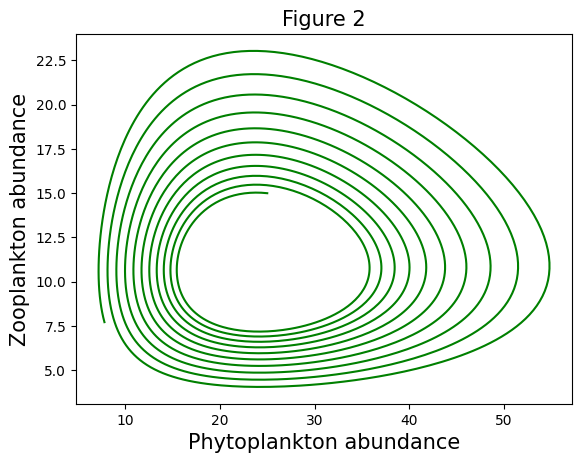

In [3]:
# Plot data   
plt.plot(PHYTO, ZOOPL, color='g')
plt.xlabel('Phytoplankton abundance', fontsize=15) 
plt.ylabel('Zooplankton abundance', fontsize=15)
plt.title("Figure 2", fontsize=15)
plt.show()

Figure 2 shows how, when the model is not in steady state, the simulations start as relatively stable oscillations (around a central point in the figure) but these oscillations become larger in time, until eventually the model will crash (e.g. zooplankton becomes less than one). 

Have a play with the code varying the initial conditions and model parameters (not too dramatically though as you will crash the model quickly) and re-run the code and phase diagram to see what the results look like.

### Introducing a habitat carrying capacity in a predator-prey model

The stability of a predator-prey model can be controlled by introducing a habitat carrying capacity (see Miller & Wheeler 2012). This can be done using a logistic equation, such that 

\begin{equation}
\frac{d P}{d t} = \alpha P ((\eta-P)/\eta) - \beta PZ,
\end{equation}

where $\eta$ is the maximum number of the phytoplankton. Let's introduce this term into the same model. Re-run the model using the code below with non-steady state initial conditions, having introduced this logistic term.

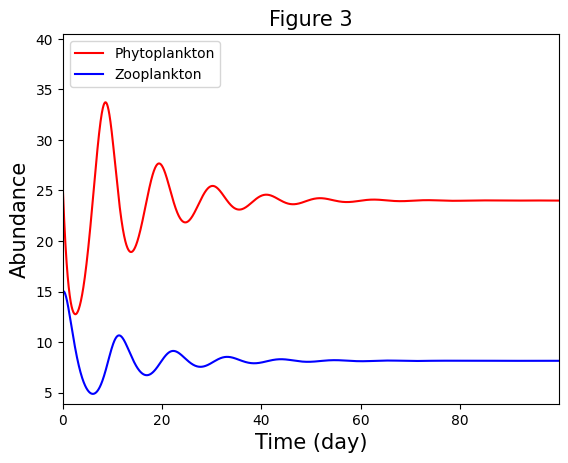

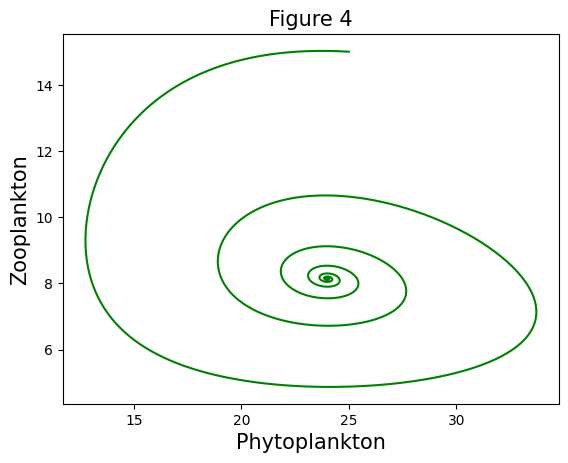

In [4]:
# Define time-steps
Days      = 100
Steps     = 24

# Set-up vectors for Phyto- and Zoo-plankton
PHYTO     = np.full(Days*Steps, 0.)
ZOOPL     = np.full(Days*Steps, 0.)
TIME      = np.full(Days*Steps, 0.)

# Define parameters for model (daily rates)
ALPHA     = 0.75
BETA      = 0.07
DELTA     = 0.025
GAMMA     = 0.6

# Initial guess for phytoplankton (prey) and zooplankton (predator)
PHYTO_IG  = 25
ZOOPL_IG  = 15

# Reduce parameters to steps within a day (hourly rates)
ALPHA_S   = ALPHA/Steps
BETA_S    = BETA/Steps
DELTA_S   = DELTA/Steps
GAMMA_S   = GAMMA/Steps

# New habitat carrying capacity parameters introduced 
# Logistic parameter
ETA_S     = 100.
# Canabilistic parameter
EPISLON   = 0.001

ct = 0
# Main daily loop
for i in range(Days):
    for i in range(Steps):
        TIME[ct]  = ct/Steps
        PHYTO[ct] = PHYTO_IG
        ZOOPL[ct] = ZOOPL_IG
        
        ## Logistic term equations (comment out when using canabilism term)
        DP        = ALPHA_S*PHYTO_IG*((ETA_S-PHYTO_IG)/ETA_S) - BETA_S*ZOOPL_IG*PHYTO_IG
        DZ        = DELTA_S*PHYTO_IG*ZOOPL_IG - GAMMA_S*ZOOPL_IG
        
        ## Cannibalistic term equations (comment out when using Logistic term)
        #DP        = ALPHA_S*PHYTO_IG - BETA_S*ZOOPL_IG*PHYTO_IG
        #DZ        = DELTA_S*PHYTO_IG*ZOOPL_IG - GAMMA_S*ZOOPL_IG - EPISLON*ZOOPL_IG**2.
        
        PHYTO_IG  = PHYTO_IG+DP
        ZOOPL_IG  = ZOOPL_IG+DZ
        ct = ct+1

# Plot data   
plt.plot(TIME, PHYTO, color='r', label='Phytoplankton')
plt.plot(TIME, ZOOPL, color='b', label='Zooplankton')
plt.xlim(np.min(TIME),np.max(TIME))
plt.ylim(np.min([PHYTO,ZOOPL])*0.8,np.max([PHYTO,ZOOPL])*1.2)
plt.xlabel('Time (day)', fontsize=15) 
plt.ylabel('Abundance', fontsize=15)
plt.title("Figure 3", fontsize=15) 
plt.legend(loc="upper left")
plt.show()

# Plot data   
plt.plot(PHYTO, ZOOPL, color='g')
plt.xlabel('Phytoplankton', fontsize=15) 
plt.ylabel('Zooplankton', fontsize=15)
plt.title("Figure 4", fontsize=15)
plt.show()

Figure 3 and 4 shows how, by introducing the maximum carrying capacity we stabilise the oscillations and reach a steady state (central point in Figure 4). 

Rather than using a maximum carrying capacity, Strom et al. (2000) introduced a cannibalistic component to the zooplankton population, that allows them to eat each other when the phytoplankton population drops to low abundances. This relieves the phytoplankton population of grazing pressure and allows them to recover. Strom et al. (2000) introduced a quadratic term to the zooplankton equation, such that 

\begin{equation}
\frac{d Z}{d t} = \delta PZ - \gamma Z - \epsilon Z^2,
\end{equation}

where $\epsilon$ controls the cannibalism by zooplankton. Let's introduce this term into our predator prey model. In the Python code above, comment out (add # in front of) to the two logistic equations (DP and DZ) in the for loop, and remove the comments from the two cannibalistic equations (DP and DZ). Then re-run the code. 

As you can see from the results, the cannibalistic term also stabilises the non-steady-state initial conditions. Have a play with the inital conditions and the parameters in the code to get a feel for how sensitive the model is. 

### Disturbance in a predator-prey model by an invasive species

The predator-prey model can be used to test ecological questions. One topic is the introduction of an invasive species. Let's take an example of this. 

Supposing we consider a marine environment whereby a single species of phytoplankton and a single species of zooplankton dominate, and their interactions can be modelled accurately using a predator-prey model. After a period of time, a ship enters the marine environment and empties its ballast water. In the ballast water is a invasive species of fish that starts eating the zooplankton.

We can use our predator-prey model (with the cannibalistic term, as in Strom et al. 2000) to ask the question: "How will this new invasive species of fish impact our system?"

To represent the impact of the invasive species system we will increase the death rate of zooplankton ($\gamma$). Re-run the predator-prey model using the code below, having introduced a change in the zooplankton death rate parameter ($\gamma$) after time-step 1000 (41 days) to reflect the introduction of an invasive fish species and see what happens.

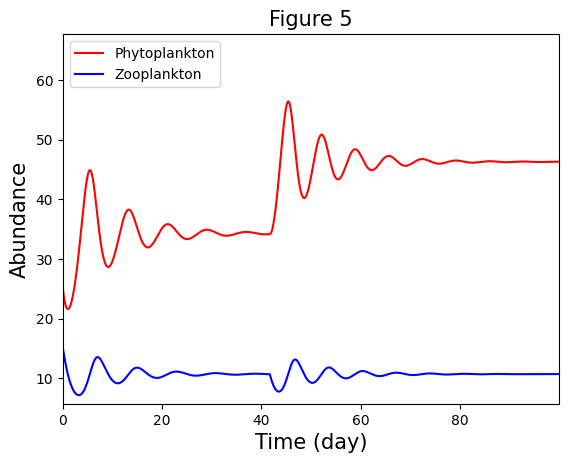

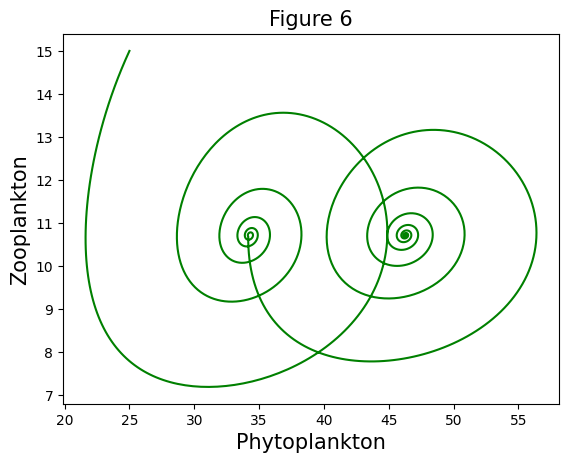

In [5]:
# Define time-steps
Days      = 100
Steps     = 24

# Set-up vectors for Phyto- and Zoo-plankton
PHYTO     = np.full(Days*Steps, 0.)
ZOOPL     = np.full(Days*Steps, 0.)
TIME      = np.full(Days*Steps, 0.)

# Define parameters for model (daily rates)
ALPHA     = 0.75
BETA      = 0.07
DELTA     = 0.025
GAMMA     = 0.6

# Initial guess for phytoplankton (prey) and zooplankton (predator)
PHYTO_IG  = 25
ZOOPL_IG  = 15

# Reduce parameters to steps within a day (hourly rates)
ALPHA_S   = ALPHA/Steps
BETA_S    = BETA/Steps
DELTA_S   = DELTA/Steps
GAMMA_S   = GAMMA/Steps

# New habitat carrying capacity parameters introduced 
# Canabilistic parameter
EPISLO   = 0.001

ct = 0
# Main daily loop
for i in range(Days):
    for i in range(Steps):
     
        TIME[ct]  = ct/Steps
        PHYTO[ct] = PHYTO_IG
        ZOOPL[ct] = ZOOPL_IG

        ## Cannibalistic term equations (comment out when using Logistic term)
        DP        = ALPHA_S*PHYTO_IG - BETA_S*ZOOPL_IG*PHYTO_IG
        DZ        = DELTA_S*PHYTO_IG*ZOOPL_IG - GAMMA_S*ZOOPL_IG - EPISLO*ZOOPL_IG**2.
        
        ## Invasive species arrives 
        if ct == 1000:
            # Invasive zooplankton species arrives 
            GAMMA       = 0.9 #0.3
            GAMMA_S     = GAMMA/Steps

        PHYTO_IG  = PHYTO_IG+DP
        ZOOPL_IG  = ZOOPL_IG+DZ
        ct = ct+1
        
# Plot data   
plt.plot(TIME, PHYTO, color='r', label='Phytoplankton')
plt.plot(TIME, ZOOPL, color='b', label='Zooplankton')
plt.xlim(np.min(TIME),np.max(TIME))
plt.ylim(np.min([PHYTO,ZOOPL])*0.8,np.max([PHYTO,ZOOPL])*1.2)
plt.xlabel('Time (day)', fontsize=15) 
plt.ylabel('Abundance', fontsize=15)
plt.title("Figure 5", fontsize=15) 
plt.legend(loc="upper left")
plt.show()

# Plot data   
plt.plot(PHYTO, ZOOPL, color='g')
plt.xlabel('Phytoplankton', fontsize=15) 
plt.ylabel('Zooplankton', fontsize=15)
plt.title("Figure 6", fontsize=15)
plt.show()

Results from the simulations in Figure 5 and 6 suggest the introduction of this new invasive species of fish causes a large increase in the abundance of phytoplankton with little average change in zooplankton abundance. The implication here is that the system has become more autotrophic.

Have another play with the model parameters. What would happen to the phytoplankton if this new invasive species of fish outcompetes other fish that fed more intensely on zooplankton? Change the parameters in the code to reflect this (e.g. lower the death rate by setting GAMMA = 0.3 in the loop where the invasive zooplankton species arrives) and see what happens to the phytoplankton.

While this is an interesting exercise to illustrate how a predator-prey model can test ecological questions, it is important to be aware of the assumptions of these models, and that, in reality, the influence of an invasive species is likely to be far more complex than this. Ideally a numerical ecosystem model should capture the key features of system, in as simple form as possible, so as to be capable of addressing the scientific question being asked. Or as stated more elegantly by Einstein "Everything should be made as simple as possible, but no simpler". For some scientific questions a predator-prey model can be a suitable tool to use, for other questions, different modelling approaches are needed.

## Nutrient, Phytoplankton and Zooplankton (NPZ) model 

We can increase the complexity of a marine ecosystem model by considering, more explicitly, other components. For example, how phytoplankton are controlled by nutrients and light. The simplest model that incorporates these components is known as a Nutrient, Phytoplankton and Zooplankton (NPZ) model. Here, we start by taking the version by Franks et al. (1986), as implemented by Miller & Wheeler (2012). This model tracks dissolved nutrient concentrations and assimilated nutrient (i.e. assimilated into phytoplankton and zooplankton) in an upper water column. 

### NPZ model of Franks et al. (1986) adapted by Miller & Wheeler (2012)

For simplicity, we implement the NPZ models in a 0D framework (box model with only time-varying components, not space varying), though NPZ models can be implemented in a variety of space-varying physical frameworks (i.e. 1D, 2D and 3D). 

The model works as such:
- Change in Phytoplankton = $+$ Nutrient Uptake $-$ Phytoplankton mortality $-$ Grazing
- Change in Zooplankton   = $+$ Zooplankton growth efficiency $\times$ Grazing $-$ Zooplankton mortality
- Change in Nutrients = $-$ Nutrient Uptake $+$ (1 $-$ Zooplankton growth efficiency) $\times$ Grazing $+$ Phytoplankton mortality $+$ Zooplankton mortality

These rules can be written out as differential equations, with functional relationships describing the terms and interactions. We will use the functional relationships and associated parameters described by Miller & Wheeler (2012), adapted from Franks et al. (1986). These equations can be described as 

\begin{equation}
\frac{d N}{d t} = -\frac{V_mN}{K_s+N}P + mP + \kappa Z + (1-\Gamma)ZR_m(1-\exp(- \Lambda P)),
\end{equation}

\begin{equation}
\frac{d P}{d t} = \frac{V_mN}{K_s+N}P- mP - ZR_m(1-\exp(- \Lambda P)),
\end{equation}

and

\begin{equation}
\frac{d Z}{d t} = \Gamma ZR_m(1-\exp(- \Lambda P)) - \kappa Z,
\end{equation}

where
- $N$ = the nutrient concentration (starting value of 1.5 $\mu$mol $N$ L$^{-1}$)
- $P$ = the phytoplankton stock size (starting value of 0.3 $\mu$mol $N$ L$^{-1}$)
- $Z$ = the zooplankton stock size (starting value of 0.1 $\mu$mol $N$ L$^{-1}$)
- $V_m$ = the maximum phytoplankton growth rate (taken here to be 1.8 d$^{-1}$)
- $K_s$ = the half saturation constant for nutrients (taken here to be 1 $\mu$mol $N$ L$^{-1}$))
- $m$ = phytoplankton mortality rate (not including grazing, taken here to be 0.1 d$^{-1}$)
- $\Gamma$ = zooplankton growth efficiency (taken here to be 0.3)
- $R_m$ = maximum zooplankton ration (taken here to be 1.5 d$^{-1}$)
- $\Lambda$ = Ivlev constant (taken here to be 1 $\mu$mol $N$ L$^{-1}$)
- $\kappa$ = zooplankton mortality rate (taken here to be 0.2 d$^{-1}$)

Following the example of Miller & Wheeler (2012), let's implement these equations in a hypothetical scenario. We are at the start of spring and the water column has just become stratified and there is enough light to sustain rapid phytoplankton growth. Therefore, the only resource limiting phytoplankton is nutrients ($N$). 

Run the NPZ model using the code below, for 100 days after stratification, at hourly timesteps.

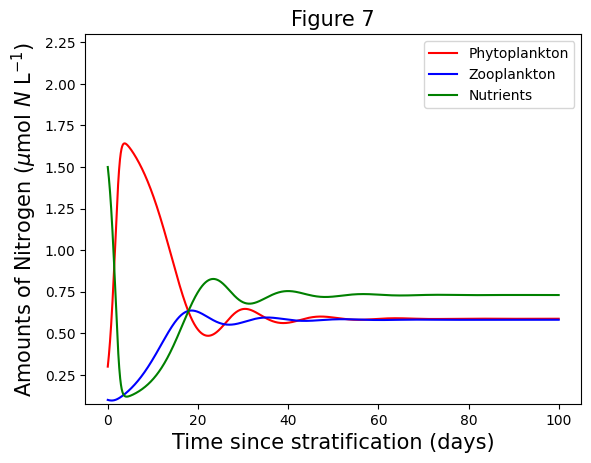

In [6]:
# Define the number of time steps
ndays  = 100
nsteps = 24

# Storage vectors for results
Tct    = np.full(ndays*nsteps, 0.0) 
Pct    = np.full(ndays*nsteps, 0.0) 
Nct    = np.full(ndays*nsteps, 0.0) 
Zct    = np.full(ndays*nsteps, 0.0)

# Set parameter values for standard run.
# Daily rates are reduced for small time steps
Vm     = 1.8/nsteps  # 0.5/nsteps 
m      = 0.1/nsteps
Rm     = 1.5/nsteps
kp     = 0.2/nsteps
Gamma  = 0.3
Ks     = 1.0
Lmda   = 1.0

#Deep water nutrients (only need for FALL BLOOM example)
NatZ   = 12.0
Mix    = 0.02/nsteps

# Set values of starting conditions
NIT    = 1.5  # 12.0
P      = 0.3
Z      = 0.1
P0     = 0.0 # 1.0

ct = 0
# Main loop starts
# One cycle per model day
for i in range(ndays):  
    
    ## UNCOMMENT THIS LINE FOR THE FALL BLOOM
    #if i > 60: 
    #    Mix = Mix + 0.2/nsteps
        
    # Subloop to allow nstep time steps per day
    for j in range(nsteps):
        Tct[ct] = ct/nsteps
        Nct[ct] = NIT
        Pct[ct] = P
        Zct[ct] = Z
        UPTAKE  = Vm*NIT/(Ks+NIT)
        if P > P0:
            Ivlev = Rm*(1.-mt.exp(-Lmda*(P-P0)))
        else:
            Ivlev = 0.
        delP = UPTAKE*P-m*P-Z*Ivlev
        delZ = Gamma*Z*Ivlev-kp*Z
        delN = -UPTAKE*P+m*P+(1-Gamma)*Z*Ivlev+kp*Z
        
        ## UNCOMMENT THIS LINE FOR THE FALL BLOOM
        #delN = -UPTAKE*P+0.6*m*P+0.4*(1-Gamma)*Z*Ivlev+0.4*kp*Z+Mix*(NatZ-NIT)
                
        # Calculate new values of P, Z, NIT
        P   = P + delP
        Z   = Z + delZ
        NIT = NIT + delN
        ct  = ct + 1
    
plt.plot(Tct, Pct, color='r', label='Phytoplankton')
plt.plot(Tct, Zct, color='b', label='Zooplankton')
plt.plot(Tct, Nct, color='g', label='Nutrients')
plt.ylim(np.min([Pct,Zct,Nct])*0.8,np.max([Pct,Zct,Nct])*1.4)
plt.xlabel('Time since stratification (days)', fontsize=15) 
plt.ylabel('Amounts of Nitrogen ($\mu$mol $N$ L$^{-1}$)', fontsize=15)
plt.title("Figure 7", fontsize=15) 
plt.legend(loc="upper right")
plt.show()   

Figure 7 shows the output from running the NPZ model. Following stratification, a phytoplankton bloom is initiated (characteristic of the spring phytoplankton bloom), which draws down the nutrient concentrations. Zooplankton graze on the phytoplankton and their stocks increase. Losses from both zooplankton and phytoplankton cause an increase in (regenerated) nutrients until eventually, all three components in the model reach a steady state. 

In this example, not all parameters or initial conditions are realistic. Therefore, let us change the following parameters and initial conditions and see what happens

- Let us reduce the maximum phytoplankton growth rate ($V_m$) to 0.5 d$^{-1}$, perhaps more realistic (doubling every two days).
- Let's change the initial conditions for nutrients, characteristic of the North Atlantic in the winter ($N$=12 $\mu$mol L$^{-1}$)

To do this modify the following lines of the code above and re-run the code

- Vm     = 0.5/nsteps
- NIT    = 12.

Figure 7 now shows a much stronger but delayed phytoplankton bloom that is eaten down by grazers before both phytoplankton and zooplankton fall to very low values, and nutrients are back close to initial values. 

The unrealistically low values for zooplankton and phytoplankton can be controlled within the Ivan function, by modifying the phytoplankton equation to 

\begin{equation}
\frac{d P}{d t} = \frac{V_mN}{K_s+N}P- mP - ZR_m(1-\exp[- \Lambda (P-P_0)]),
\end{equation}

where $P_0$ is the minimum phytoplankton stock that must be present for grazing to take place. This equation, along with a statement (see the "if P > P0" statement in the loop of the code above) that forces the Ivan function to zero when phytoplankton stock $P$ is less and $P_0$, enforces low, constant values for $P$ and $Z$ after the phytoplankton bloom. To test this, change the following line in the code above, and re-run the code

- P0    = 1.0

Figure 7 should now show higher values for $P$ and $Z$ after the phytoplankton bloom.

In subpolar waters like the North Atlantic, it is common to observe an autumn fall bloom. This is caused by a break-down of stratification and consequent injection of nutrients from deep waters, following the passing of autumnal storms. Such features can be introduced into our NPZ box model, by making some of the phytoplankton and zooplankton that die sink out of our water column, and by mixing with the deep nutrient rich water ($N$=12 $\mu$mol L$^{-1}$). To do this change the following lines of code (be careful to make sure your indentation of the code is correct, particularly for the if statement).
 
- Uncomment the lines: if i > 60: & Mix = Mix+0.2/nsteps
- Uncomment the lines: delN = -UPTAKE * P  +0.6 * m * P + 0.4 * (1-Gamma) * Z * Ivlev + 0.4 * d * Z + Mix * (NatZ - NIT)

Figure 7 should now show a small fall bloom around day 70. 

Let's move onto a more complex NPZ model that considers more explicitly light and nutrient resources for phytoplankton. 

### NPZ model of Evans & Parslow (1985) adapted by Miller & Wheeler (2012)

Phytoplankton blooms in the mixed layer are known to occur after winter, when the mixed-layer shallows with the onset of stratification, causing higher light within the mixed layer, enhanced by increasing solar radiation as we move into spring. 

Here, we will use an NPZ model to capture this seasonal transition. Specifically, we will use the model of Evans & Parslow (1985), adapted by Miller & Wheeler (2012). The model is more realistic than the previous NPZ example as it simulates phytoplankton stocks with seasonally varying, and exponential depth-changing, irradiance within the mixed-layer, and integrates phytoplankton growth appropriately with depth, accounting for losses to depth when the layer shallows and dilution when it deepens. Like the previous NPZ model, this model also accounts for other controls on phytoplankton, including nutrient limitation and zooplankton grazing. Phytoplankton growth is controlled by selecting the minimum of the growth rates computed independently from nutrients and light (Liebig's "law of the minimum"). The model uses the following equations (see Miller & Wheeler 2012)

\begin{equation}
\frac{dM_Z}{d t} = \zeta^+(t),
\end{equation}

\begin{equation}
\frac{d N}{d t} = -gP + (\zeta^+(t)0.025M_z)(N_{d}-N)- 0.5mP + 0.5r_gZ,
\end{equation}

\begin{equation}
\frac{d P}{d t} = gP - mP - r_gZ - \zeta^+(t)P,
\end{equation}

and

\begin{equation}
\frac{d Z}{d t} = r_g \Gamma Z - c_nZ - (M_z(t)-M_z(t-1))\frac{Z}{M_z(t)}.
\end{equation}

Symbols are defined for these parameters and variables below. The growth rate of phytoplankton ($g$, d$^{-1}$) is computed as 

\begin{equation}
g = \text{min}\{V_m(1-\exp(-\alpha I/V_m)), V_mN/(K_s+N)\}.
\end{equation}

When limited by light, growth follows a classical $P$ and $I$ curve (Denman and Pena 1999, used here). Surface light ($I_0$) is approximated from Brock (1981) for a given date and latitude (clear-sky), and propagated with depth $z$ through the mixed-layer using Beer-lambert law, and estimating $K_d$ using pure water ($K_{d,w}$) and the product of $P$ (converted to Chl-a from nitrogen) and the Chl-specific $P$ attenuation ($K_{d,p}$). The grazing ($r_g$) is computed as

\begin{equation}
r_g = c(P - P_0)/(\kappa+P-P_0).
\end{equation}

Where
- $t$ = time (d$^{-1}$)
- $M_z$ = mixed-layer depth (m)
- $g$ = phytoplankton growth rate (d$^{-1}$)
- $P$ = the phytoplankton stock size ($\mu$mol $N$ L$^{-1}$)
- $P_0$ = the phytoplankton minimum stock size ($\mu$mol $N$ L$^{-1}$)
- $N_d$ = the deep nutrient concentration (below $M_L$) ($\mu$mol $N$ L$^{-1}$)
- $N$ = the nutrient concentration ($\mu$mol $N$ L$^{-1}$)
- $m$ = phytoplankton mortality rate (d$^{-1}$)
- $r_g$ = grazing (d$^{-1}$)
- $c$   = grazing rate (d$^{-1}$)
- $Z$ = the zooplankton stock size ($\mu$mol $N$ L$^{-1}$)
- $V_m$ = the maximum phytoplankton growth rate (d$^{-1}$)
- $K_s$ = the half saturation constant for nutrients ($\mu$mol $N$ L$^{-1}$)
- $I_z$ = Irradiance at a given depth ($z$) (W m$^{-2}$)
- $I_0$ = Irradiance at the surface ($z$) (W m$^{-2}$)
- $\kappa$ = zooplankton mortality rate (d$^{-1}$)
- $c_n$ = carnivorous factor 
- $\Gamma$ = zooplankton growth efficiency
- $\zeta^+(t)$ = change in concentration ($N$ or $P$) due to altered mixed-layer depth (not applied to $Z$, as they are assumed to be able to swim.
- $0.025M_z$ = represent exchange in $N$ between mixing layer and deeper water (d$^{-1}$)
- $K_d$ = Diffuse attenuation light coefficient (m$^{-1}$)

The Evans & Parslow (1985) NPZ model, adapted by Miller & Wheeler (2012), is forced with a mixed-layer seasonal cycle characteristic of subarctic waters, at least in shape (maxima Feb/March followed by rapid stratification, minima in spring/summer, and a deepening in autumn). 

Run the NPZ model using the code below, at daily timesteps, to produce the seasonal cycle using the model.

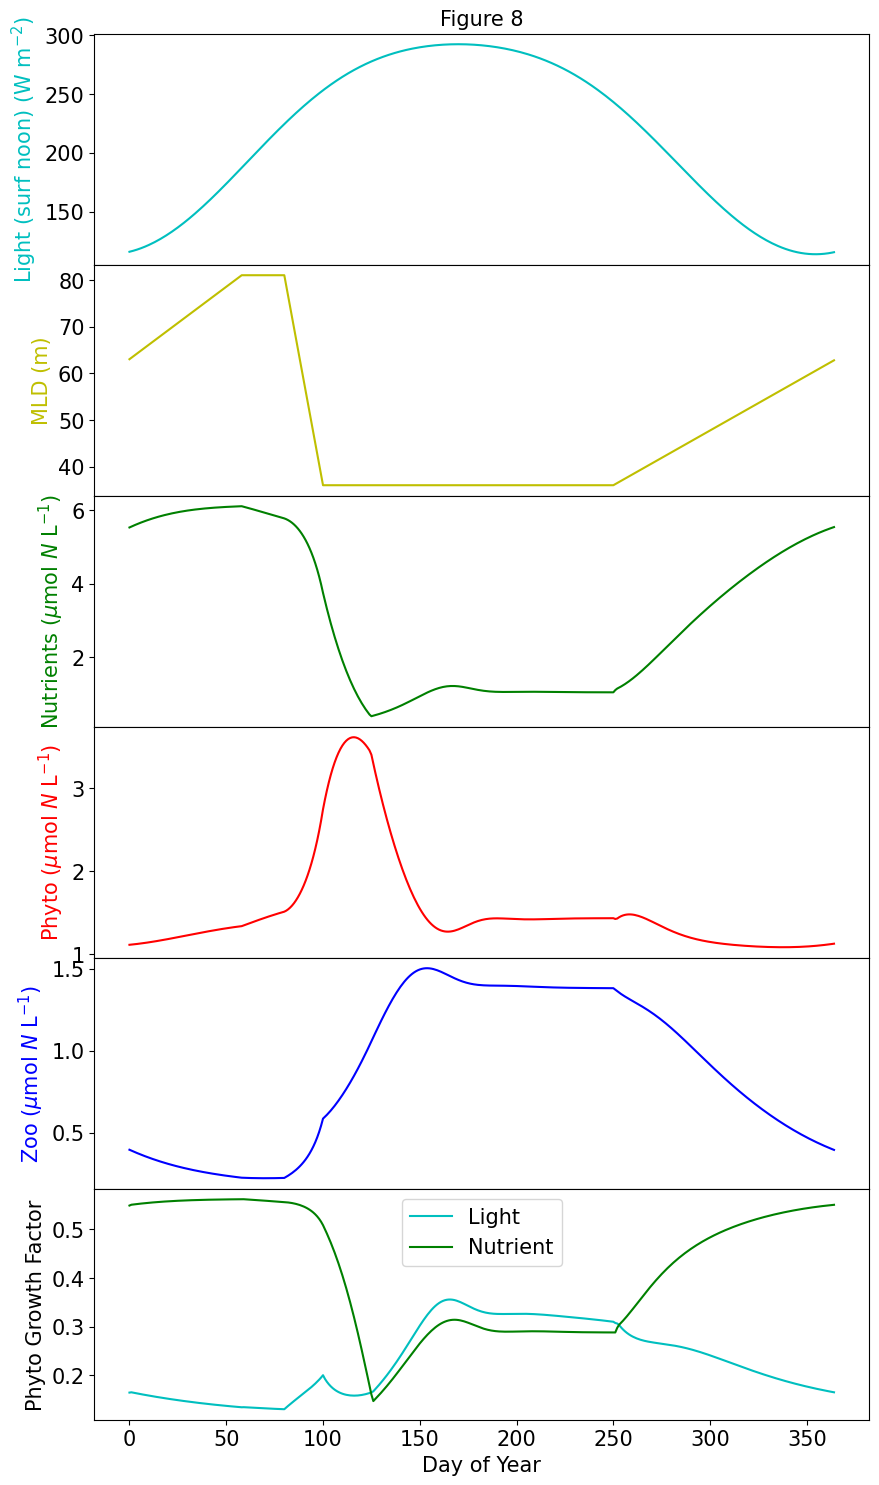

[115.92729028 116.34151114 116.79247761 117.27998191 117.8037981
 118.36368216 118.9593721  119.59058802 120.25703218 120.95838918]


In [25]:
# Define location and run length 
Lat        = 47.     #Latitude (location)
nyears     = 1      #Number of years
Daysofyear = 365    #Day of year 
Daystr     = np.full(Daysofyear*nyears, float("nan"))   # Storage vector for days
Pstr       = np.full(Daysofyear*nyears, float("nan"))   # Storage vector for Phytoplankton 
Nutstr     = np.full(Daysofyear*nyears, float("nan"))   # Storage vector for Nutrients
Zstr       = np.full(Daysofyear*nyears, float("nan"))   # Storage vector for Zooplankton
MLZ        = np.full(Daysofyear*nyears, float("nan"))   # Storage vector for mixed-layer depth
Io_noon    = np.full(Daysofyear*nyears, float("nan"))   # Storage vector for Surface noon light
Nut_Gro    = np.full(Daysofyear*nyears, float("nan"))   # Storage vector for Phyto growth Nutrient
Lig_Gro    = np.full(Daysofyear*nyears, float("nan"))   # Storage vector for Phyto growth Light

# Solar Constant (W/m^2), atmospheric attenuation, PAR fraction (Brock 1981)
SolarK     = 1373.
AtmAtt     = 0.5
ParFrac    = 0.48

# Light (water extinction, phyto extinction), from Fasham et al. (1990);
Kdw        = 0.1    # Water extinction
Kdp        = 0.12   # Phytoplankton extinction (concentration specific)
Ks         = 1.5    # 1/2 saturation constant (I think)
Nd         = 10.0   # Deep nutrient concentrations
Nut        = 5.4541 # Intital nutrient concentartion
Mprev      = 62.    # Mixing depth

# Phytoplankton growth 
alpha      = 0.04   # alpha [h^-1/W m^-2]
Vmax       = 0.7    # Vmax [d^-1]
P          = 1.1228 # Phytoplankton starting values
m          = 0.07   # mortality [d^-1]

# Zooplankton parameters
c          = 0.35   # grazing rate [d^-1]  (Try 0.6)
kappa      = 1.0    # mortality rate [d^-1]
P0         = 0.1    # threshold P
Gamma      = 0.35   # growth efficiency 
Z          = 0.4048 # statrting value
CN         = 0.07   # death rate

# Generate yearly sequence of mixed layer dpeths (MLZ) for Yr = 1:nyears 
for j in range(nyears):
    for i in range(Daysofyear):
        Day          = j * Daysofyear+i
        X            = 1
        if i < 58: 
            MLZ[Day] = X + 62 + i*18./58.
        if i >= 58 and i < 81:
            MLZ[Day] = X + 80.000000
        if i > 80 and i < 101:
            MLZ[Day] = X + 80.-45.*(i-80.)/20.
        if i > 100 and i < 250:
            MLZ[Day] = X + 35.0000000
        if i >= 250:
            MLZ[Day] = X + 35. + 27.*(i-250.)/115.

# Loop through each year of year
for Yr in range(nyears):
    # Loop through the days
    for i in range(Daysofyear):
        Day         = Yr * 365 + i
        Daystr[Day] = Day
        
#COMPUTE THE LIGHT ENVIRONMENT
        #COMPUTE EXTINCTION COEFFICIENT Kd
        #NOTE Error in the Matlab scrip p83 of Miller and Wheeler
        #P need to be converted to Chl
        Kd         = Kdw + Kdp * (P*8*12/50) #P need to be converted to Chl!!!!!!!
        # Compute surface PAR at latitude for times of day 
        # and dawn to noon and production rate integration down to MLD
        # Decination = angle of sun above equator
        D1          = 23.45*np.sin(np.deg2rad((360.*(284.+i)/365.)))    
        # Angle(deg) between south (i.e. noon) and setting sun
        W1          = np.arccos(np.deg2rad((-1.*(np.tan(np.deg2rad(Lat)) \
                     * np.tan(np.deg2rad(D1))))))
        # One-half daylength, hours to noon
        # Earth rotates 15 = degrees / hour
        L1          = W1/15.
        # Distance of Earth from sun relative to average, a minor effect
        Rx          = 1./mt.sqrt(1.+0.033*np.cos(np.deg2rad((360.*i/365.))))
        VtofD       = L1/40.
        TofD        = 12.01-L1-VtofD
        SGr         = 0.
        # Loop over dawn to noon in 40 steps
        for j in range(40):
            TofD   = TofD + VtofD   # for the following see Brock (1981)
            W2     = (TofD-12.)*15.
            CosZen = np.sin(np.deg2rad(D1))*np.sin(np.deg2rad(Lat)) \
                     +np.cos(np.deg2rad(D1))*np.cos(np.deg2rad(Lat)) \
                     *np.cos(np.deg2rad(W2))
            Isurf  = SolarK*CosZen/(Rx*Rx)
            Io     = Isurf*AtmAtt*ParFrac
            # Save Noon PAR for plotting
            if j == 19:
                Io_noon[Day] = Io
            for k in range(int(MLZ[i])):
                Iz = Io*mt.exp(-1.*Kd*k)
                
#COMPUTE Phytoplankton Growth Rate for each sum from 0 to MLZ and dawn to non             
                # Denman-Pena function for phyto growth, scales (0-1)
                Gr     = Vmax*(1. - mt.exp(-alpha*Iz/Vmax))
                SGr    = SGr+Gr
            
#COMPUTE http://localhost:8888/notebooks/Jupyter/GEO3466/Practical_2/GEO3466_Practical_2.ipynb#Phytoplankton Growth Rate over the day (LIGHT EFFECT)
        AveGr = 2.*SGr/(MLZ[i]*40.)  # (2* to get dawn to dusk)
        Lig_Gro[Day] = AveGr
        
#COMPUTE Phytoplankton Growth rate NUTRIENT EFFECT)
        NL    = Vmax*Nut/(Ks+Nut) # (NUTRIENT EFFECT)
        Nut_Gro[Day] = NL
        
        # Take minimium growth rate
        if NL < AveGr:
            G = NL
        else:
            G = AveGr
        
#COMPUTE mixing due to mixed layer deepening
        if MLZ[i] > Mprev:
            zeta = MLZ[i] - Mprev
        else:
            zeta = 0.0000
        
#COMPUTE Grazing rate accounting for grazing threshold
        graz  = c*(P-P0)/(kappa+P-P0)
        if P < P0:
            graz = 0.000

#COMPUTE Phytoplankton state variable
        P        = P + G * P - m*P -graz*Z - ((0.025*MLZ[i]+zeta)/MLZ[i])*P
        Nut      = Nut - G*P + ((0.025*MLZ[i]+zeta)/MLZ[i])*(Nd - Nut) + \
                   0.5*m*P + 0.5*graz*Z
        DH       = graz * Gamma * Z - CN*Z - (MLZ[i]-Mprev) *Z/MLZ[i]
        Z        = Z + DH 

        Mprev     = MLZ[i]
        Pstr[Day] = P   # For P as Chl, multiple P by *8*12/50
                        # 8 = C/N, 12 = ,g C / mmoleC, 50 c/Chl
        Nutstr[Day] = Nut
        Daystr[Day] = Day
        Zstr[Day]   = Z


# Plot data
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, sharex=True, figsize=(10,18), \
    gridspec_kw={'hspace': 0})
ax1.plot(Daystr,Io_noon, color='c')
ax1.set_title('Figure 8', fontsize=15, color='k')
ax1.set_ylabel('Light (surf noon) (W m$^{-2}$)', fontsize=15, color='c')
ax1.yaxis.set_tick_params(labelsize=15)

ax2.plot(Daystr,MLZ, label='MLD', color='y')
ax2.set_ylabel('MLD (m)', fontsize=15, color='y')
ax2.yaxis.set_tick_params(labelsize=15)

ax3.plot(Daystr,Nutstr, color='g')
ax3.set_ylabel('Nutrients ($\mu$mol $N$ L$^{-1}$)', fontsize=15, color='g')
ax3.yaxis.set_tick_params(labelsize=15)

ax4.plot(Daystr,Pstr, color='r')
ax4.set_ylabel('Phyto ($\mu$mol $N$ L$^{-1}$)', fontsize=15, color='r')
ax4.yaxis.set_tick_params(labelsize=15)

ax5.plot(Daystr,Zstr, color='b')
ax5.set_ylabel('Zoo ($\mu$mol $N$ L$^{-1}$)', fontsize=15, color='b')
ax5.yaxis.set_tick_params(labelsize=15)

ax6.plot(Daystr,Lig_Gro, color='c', label='Light')
ax6.plot(Daystr,Nut_Gro, color='g', label='Nutrient')
ax6.set_ylabel('Phyto Growth Factor', fontsize=15)
ax6.yaxis.set_tick_params(labelsize=15)
ax6.set_xlabel('Day of Year', fontsize=15)
ax6.xaxis.set_tick_params(labelsize=15)
plt.legend(loc="upper center", fontsize=15)

plt.show()

print(Io_noon[0:10])

Figure 8 shows the classical seasonal cycle in subpolar regions (~47 degrees N): 
- Light highest in the summer and lowest in the winter. 
- Mixed-layer is shallowest in the summer, deepest late winter. It shoals sharply in spring, and steadily deepens in autumn.
- Phytoplankton bloom in spring (April), are low in summer, there is a (very small) fall bloom, and stocks are lowest over the winter.
- Nutrients cycles are inverse to phytoplankton.
- Zooplankton bring down the phytoplankton bloom in spring and remain high over the summer. 
- Phytoplankton growth (bottom figure) is light limited in the winter (minimum of the two factors) and nutrient limited (minimum of the two factors) in the summer. 

Of course, these results look relatively good. However, how sensitive is the model to changes in parameters? Why not have a play with the code to see? For example, if you change the grazing rate (c = 0.35 in the code above) from 0.35 to 0.6 you will eliminate the spring bloom and just cause oscillations over summer, as higher grazing pressure prevents the bloom developing (this is thought to partly reflect why blooms rarely occur in low-latitude regions).


## Conclusion

In this practical you have learnt how to use numerical ecosystem modelling to explore the interactions between phytoplankton, zooplankton and their environment. You have learnt how to use two different types of models, a predator-prey model, and an NPZ model. 

You should now have a better understanding of what numerical ecosystem modelling is all about, how to implement a basic predator-prey model and NPZ models, how you use these ecosystem model to test ecological questions.

Additional information on numerical ecosystem modelling is provided in Lecture 6 of GEO3466: "Numerical Ecosystem Modelling". For further details on numerical models, I also recommend reading Chapter 4 of Miller & Wheeler (2012), much of which this practical is based on. 


## Further reading (more sophisticated ecosystem models)

If you would like to learn about even more sophisticated ecosystem models, there is an excellent book by Fennel and Neumann (2014), and also I suggest reading page 85-95 of Chapter 4 of Miller & Wheeler (2012).

## References

Brock, T.B. (1981) Calculating solar radiation for ecological studies. Ecological Modelling, 14, 1-19. https://doi.org/10.1016/0304-3800(81)90011-9 

Denman, K.L. & Pena, M.A. (1999) A coupled 1-D biological/physical model of the northeast subarctic Pacific Ocean with iron limitation. Deep-sea Research II, 46, 2877-2908. https://doi.org/10.1016/S0967-0645(99)00087-9 

Evans, G.T. & Parslow, J.S. (1985) A model of plankton annual cycles. Biological Oceanography, 3, 327-347. https://doi.org/10.1080/01965581.1985.10749478 

Fennel, W. and Neumann, T., 2014. Introduction to the modelling of marine ecosystems. Elsevier.

Franks, P.J.S., Wroblewski, J.S. & Flierl, G.R. (1986) Behavior of a simple plankton model with food-level acclimation by herbivores. Marine Biology, 91, 121-129. https://doi.org/10.1007/BF00397577 

Lotka, A.J. (1925) Elements of Physical Biology. Williams & Wilkins Co., Baltimore, 465 pp.

Miller, C.B. & Wheeler, P.A. (2012). Biological Oceanography. John Wiley & Sons.

Strom, S.L., Miller, C.B. & Frost, B.W. (2000) What sets the lower limits to phytoplankton stocks in high nitrate, low-chlorophyll regions of the open ocean? Marine Ecological Progress Series 193, 19-31. https://doi.org/10.3354/MEPS193019 

Volterra, V. (1926a). Variazioni e fluttuazioni del numero d'individui in specie animali conviventi. Mem. Acad. Lincei Roma. 2: 31–113.

Volterra, V. (1926b) Fluctuations in the abundance of a species considered mathematically. Nature 118, 558-560. https://doi.org/10.1038/118558a0 

